# 🚀 Project: Predicting Employee Attrition

Goal: Predict whether an employee will leave the company based on various factors.

# Step 1: Load Libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report


# Step 2: Load Dataset

In [14]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Encode target
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
df.shape

(1470, 35)

In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


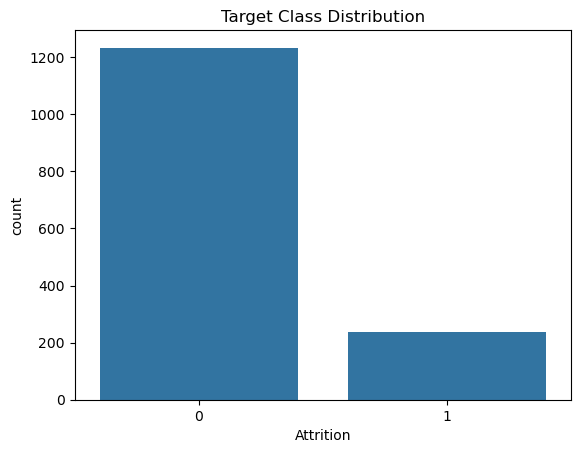

In [19]:
sns.countplot(x='Attrition', data=df)
plt.title('Target Class Distribution')
plt.show()


###### Check Class Distribution
Shows how many employees left vs stayed.

Important for imbalanced dataset handling.

#### Visualize Numerical Features
Helps understand data ranges and skewness

Outliers are easy to spot

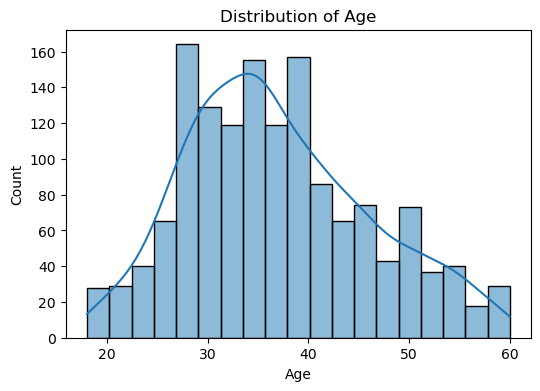

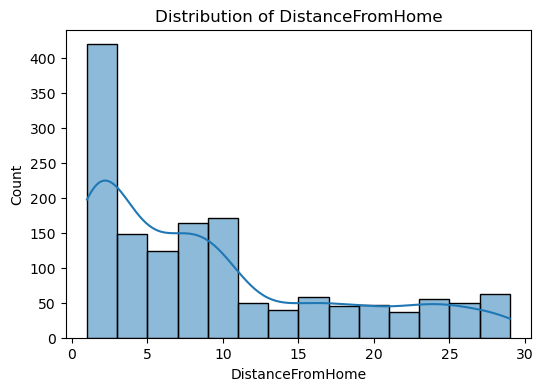

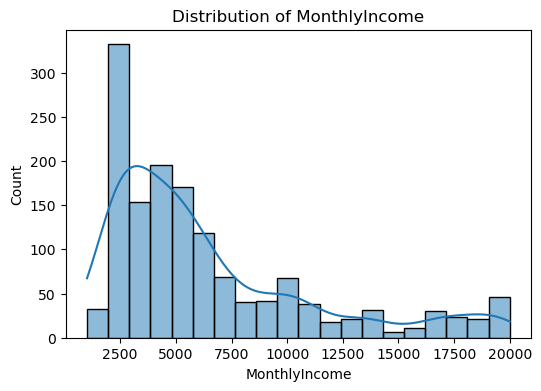

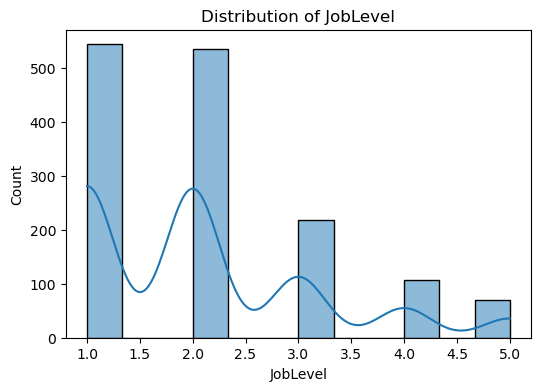

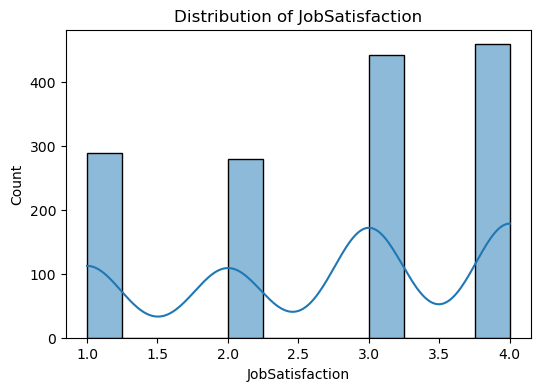

In [20]:
numerical_cols = ['Age','DistanceFromHome','MonthlyIncome','JobLevel','JobSatisfaction']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


#### Boxplots to Check Outliers

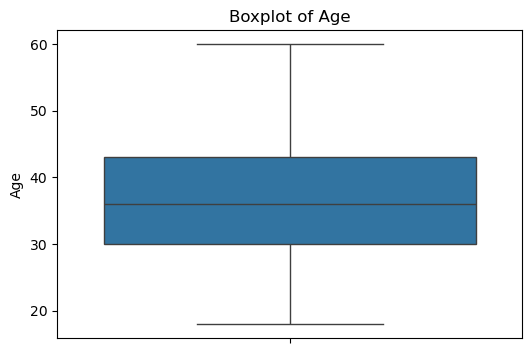

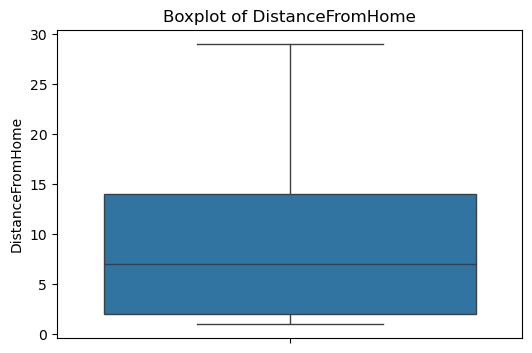

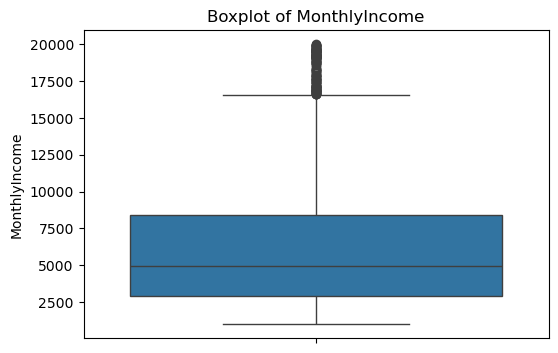

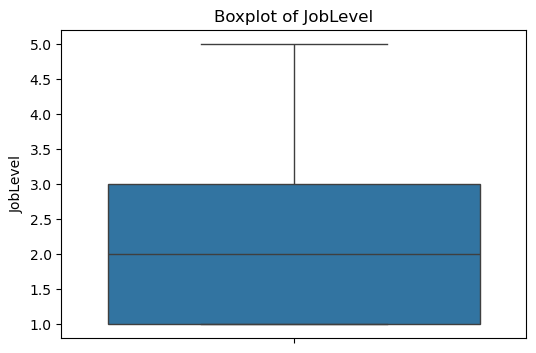

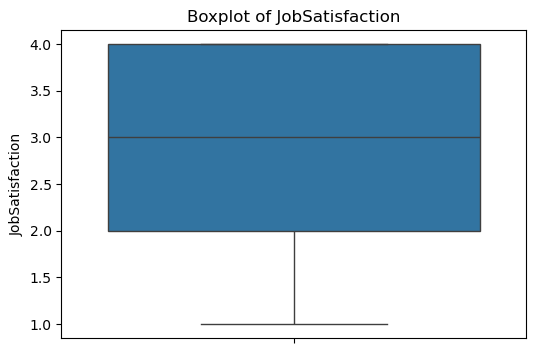

In [21]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


##### Correlation Heatmap
hows which features are strongly correlated with Attrition

Useful for feature selection

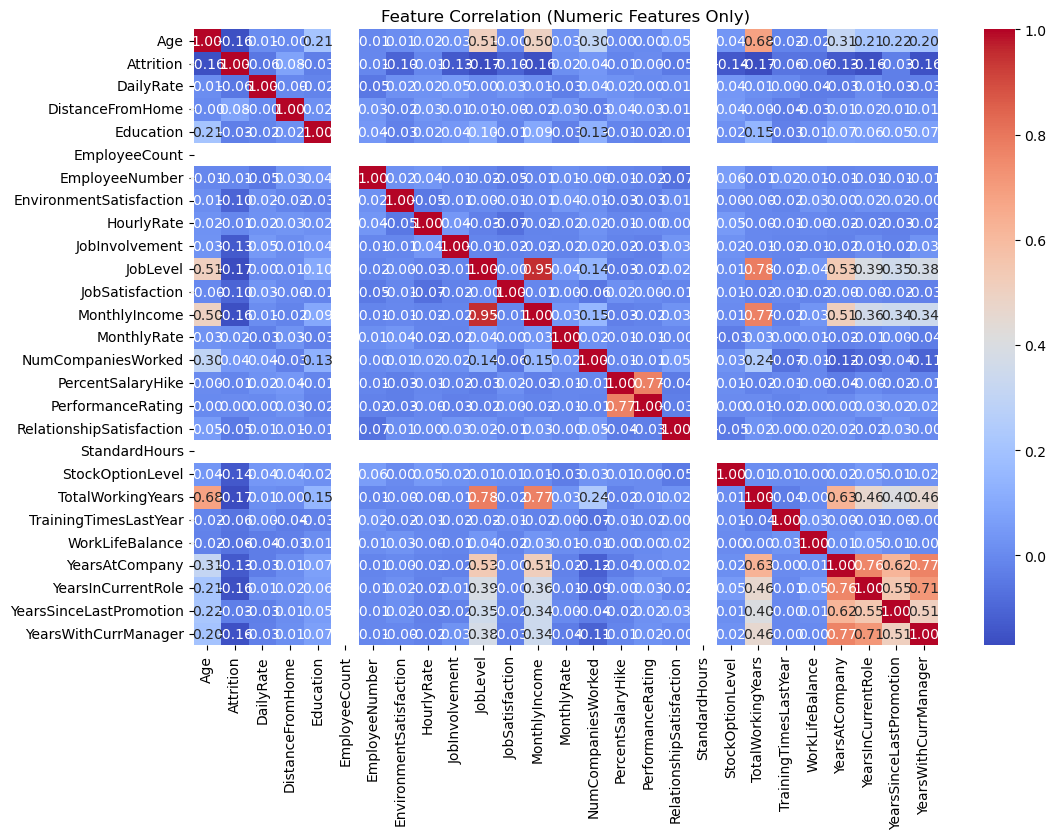

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation (Numeric Features Only)')
plt.show()


#### Categorical Feature Analysis
Helps see patterns in categorical features

E.g., employees working overtime might leave more

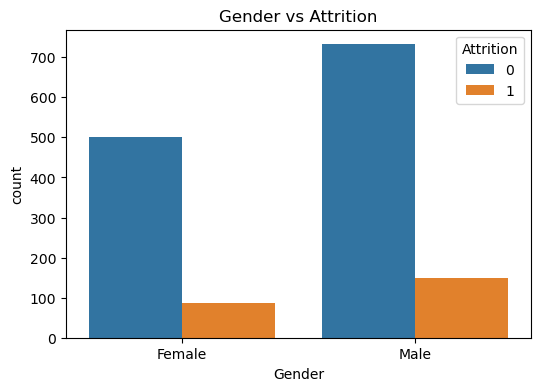

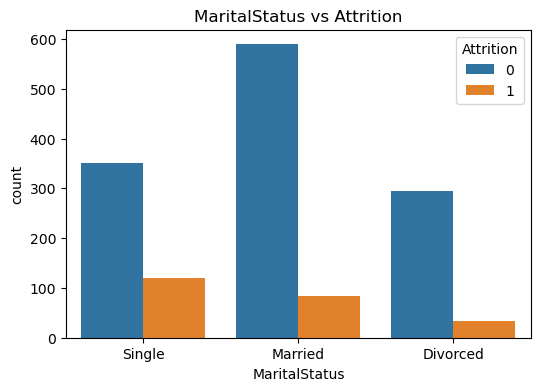

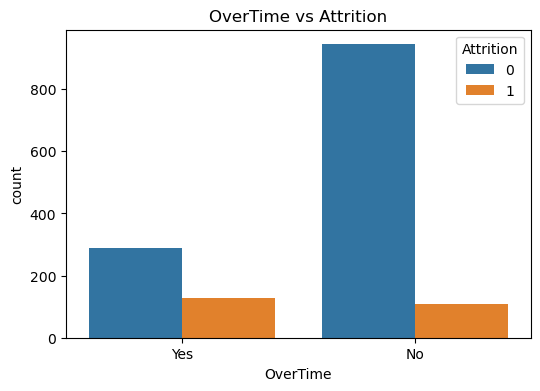

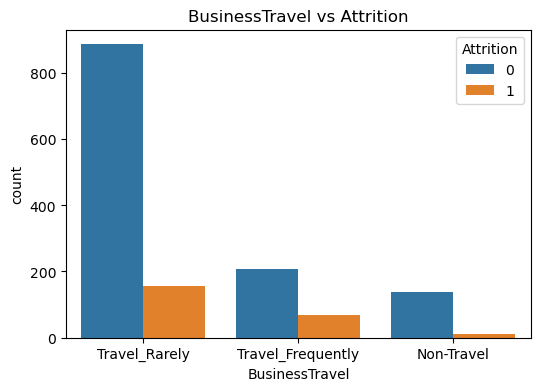

In [23]:
categorical_cols = ['Gender','MaritalStatus','OverTime','BusinessTravel']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(f'{col} vs Attrition')
    plt.show()


# Step 3: Feature Engineering

 1.Encode categorical features
 
✅ Why do we do this?

ng algorithms cannot understand text directly.

They work with numbers.

Encoding converts categories (like Male/Female, Sales/HR) into numeric values so the model can learn patterns.

2.Scale numerical features

✅ Why?

Helps models learn faster and perform better, especially algorithms like Logistic Regression, SVM, or Neural Networks.

3.Split features and target

✅ Why?

Training and testing separately helps us see how the model performs on new unseen data, not just memorizing the training data.

In [24]:
#  Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [25]:
## Scale numerical features
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
numerical_cols = numerical_cols.drop('Attrition')  # target column should not be scaled
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [26]:
# Split features and target
X = df.drop(['EmployeeNumber','Attrition'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Simple Rule of Thumb

Scale: Numerical columns with different magnitudes or units.

Don’t scale:

Target column  # target column should not be scaled

Encoded categorical columns (label encoding / one-hot)

# Step 4: ML Algorithms

## 1. Logistic Regression

In [27]:
import warnings
warnings.filterwarnings('ignore')


In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
 

Logistic Regression Accuracy: 0.8945578231292517


## 2. Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8333333333333334


## 3. Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8741496598639455


## 4. K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.8639455782312925


  File "C:\Users\Shivani\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Shivani\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shivani\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shivani\anaconda3\Lib\sub

## 5. Support Vector Machine

In [32]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.8877551020408163


## 6. Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8435374149659864


## 7. Gradient Boosting (XGBoost)

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8707482993197279


## 8. Neural Network (MLP)

In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))


MLP Accuracy: 0.8401360544217688


## 9. PCA + Logistic Regression

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
print("PCA + Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_pca))


PCA + Logistic Regression Accuracy: 0.8707482993197279


## 10. K-Means Clustering (Optional)

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters
print(df['Cluster'].value_counts())


Cluster
0    981
1    489
Name: count, dtype: int64


## 11. LSTM / RNN (Optional)

Can use tenure or monthly income trend to predict attrition in sequence

Same LSTM code structure as in the Churn project

# Step 5: Evaluate All Models

In [38]:
models = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'KNN': y_pred_knn,
    'SVM': y_pred_svm,
    'Naive Bayes': y_pred_nb,
    'XGBoost': y_pred_xgb,
    'MLP': y_pred_mlp,
    'PCA + LR': y_pred_pca
}

for name, pred in models.items():
    print(f"---{name}---")
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))


---Logistic Regression---
Accuracy: 0.8945578231292517
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294

---Decision Tree---
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       255
           1       0.27      0.15      0.20        39

    accuracy                           0.83       294
   macro avg       0.58      0.55      0.55       294
weighted avg       0.80      0.83      0.81       294

---Random Forest---
Accuracy: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                 

In [39]:
# Saving Model $ Scaler

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import pickle

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

y = df["Attrition"].map({"Yes": 1, "No": 0})

# SELECT ONLY THESE COLUMNS (important fix)
X = df[[
    "Age",
    "DailyRate",
    "MonthlyIncome",
    "JobLevel",
    "Gender",
    "Department",
    "BusinessTravel",
    "EducationField",
    "MaritalStatus",
    "TotalWorkingYears"
]]

numeric_cols = ["Age", "DailyRate", "MonthlyIncome", "JobLevel", "TotalWorkingYears"]
categorical_cols = ["Gender", "Department", "BusinessTravel", "EducationField", "MaritalStatus"]

preprocess = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

model = Pipeline([
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier())
])

model.fit(X, y)

pickle.dump(model, open("model.pkl", "wb"))

print("Model saved successfully!")


Model saved successfully!


# 1️⃣ How to Explain the Project in an Interview

You want to tell a clear story: Problem → Approach → Solution → Results → Learnings.

Step 1: Project Context (1–2 sentences)

“I built a Machine Learning project to predict whether an employee will leave the company using HR data.”

“The goal was to help the HR team proactively retain employees.”

Step 2: Dataset Overview

Mention dataset size and columns:

Numerical features: Age, Salary, Tenure, etc.

Categorical features: Gender, Department, Job Role, etc.

Example: “I used ~1,400 employee records with 30+ features.”

Step 3: Preprocessing / Feature Engineering

“I cleaned the data (missing values, incorrect types).”

“Categorical features were encoded with LabelEncoder.”

“Numerical features were scaled with StandardScaler for models like KNN and SVM.”

“I also applied PCA to reduce dimensions and see if it improves model performance.”

Step 4: ML Algorithms Used

Mention all algorithms: Logistic Regression, Decision Tree, Random Forest, KNN, SVM, Naive Bayes, XGBoost, MLP, PCA + LR.

Briefly explain why multiple algorithms:

“I compared multiple models to find the one with highest accuracy and recall for predicting attrition.”

Step 5: Model Evaluation

Metrics: Accuracy, Confusion Matrix, Classification Report (Precision, Recall, F1-Score)

Example: “Random Forest performed best with 87% accuracy and balanced precision-recall.”

Step 6: Optional Advanced Analysis

Clustering (K-Means) for grouping employees by risk of leaving

LSTM for sequence-based predictions if using historical monthly performance or tenure trends

Step 7: Practical Impact

“This project helps HR:

Identify employees at risk of leaving

Take proactive measures (training, incentives)

Reduce attrition costs”

### Explanation for Interview

Preprocessing: Scaling numerical features and encoding categorical ones

Multiple models: Allows interviewer to see comparison in real-time

Probability output: Shows model confidence (useful in real-world HR decisions)

PCA + Logistic Regression: Demonstrates dimensionality reduction

# 🎤 Interview Script: Employee Attrition Project

1️⃣ Start with the Problem (10–15 seconds)

"In this project, I built a machine learning modelto predict whether an employee is likely to 

leave the company.Goal was to Predict whether an employee will leave the company based on various factors.

2️⃣ Dataset Overview (5–10 seconds)

"I used a dataset of around 1,400 employees with over 30 features, including numerical features like 

age, monthly income, job satisfaction, and categorical features like gender, marital status, 

overtime, and business travel."

3️⃣ Preprocessing & Feature Engineering (10 seconds)

"I preprocessed the data by encoding categorical variables and scaling numerical features. I also 

experimented with dimensionality reduction using PCA for one of the models to improve performance."

4️⃣ Models & Evaluation (10–15 seconds)

"I trained multiple models including Logistic Regression, Decision Tree, Random Forest, KNN, SVM, 

Naive Bayes, XGBoost, MLP, and PCA + Logistic Regression. I evaluated them using accuracy, precision,

recall, and F1-score. Random Forest and XGBoost performed best on this dataset."

5️⃣ Web App / Deployment (10 seconds)

"I deployed the project as a Streamlit web app, which allows HR to input employee details in real-

time and predict attrition. The app scales and encodes the input automatically and shows both the

prediction and the probability of leaving."

6️⃣ Impact & Learning (5–10 seconds)

"This project demonstrates the full ML workflow from data preprocessing to model deployment. It helps 

HR make informed decisions and showcases my skills in Python, machine learning, feature engineering,

and web app deployment."